# Project: Wrangling and Analyze Data

## Data Gathering

In order to download and read the WeRateDogs Twitter archive data, the pandas python library will be imported

In [1]:
import pandas as pd

In [2]:
# Read the Twitter archive into a DataFrame
df_archive = pd.read_csv('twitter-archive-enhanced-2.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# import the requests library
import requests

The file will be saved in a response object and its content will be written to a Tab Separated File (.tsv file) called 'image-predictions.tsv'. A pandas data frame will then be created.

In [4]:
# Programatically download the file image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [3]:
# Create a DataFrame of the image predictions flat file.
df_img = pd.read_csv('image-predictions.tsv', sep='\t')
df_img.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# Function  to measure the time taken to execute a function
import time

In [8]:
# import tweepy
import tweepy
import json
import os

# Authentication details
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

id_list = archive['tweet_id'].values.tolist()
rank = 0

for id in id_list:
    iteration_start = time.time()
    rank += 1
    try:
        data = api.get_status(id, tweet_mode='extended')   
        json_string = json.dumps(data._json)
        if not os.path.exists('tweet_json.txt'):
            with open('tweet_json.txt', mode='w') as fp:
                fp.write(json_string)
                fp.write('\n')
        else:
            with open('tweet_json.txt', mode='a') as fp:
                fp.write(json_string)
                fp.write('\n')
        print('id = {} while list rank = {}'.format(id, rank))
    except:
        pass
    iteration_end = time.time()
    iteration_time = iteration_end - iteration_start
    print('Time taken by iteration: {}seconds'.format(iteration_time))
    print('')

id = 892420643555336193 while list rank = 1
Time taken by iteration: 0.881037712097168seconds

id = 892177421306343426 while list rank = 2
Time taken by iteration: 0.7159848213195801seconds

id = 891815181378084864 while list rank = 3
Time taken by iteration: 0.7585244178771973seconds

id = 891689557279858688 while list rank = 4
Time taken by iteration: 0.7193276882171631seconds

id = 891327558926688256 while list rank = 5
Time taken by iteration: 0.7943310737609863seconds

id = 891087950875897856 while list rank = 6
Time taken by iteration: 0.7850182056427002seconds

id = 890971913173991426 while list rank = 7
Time taken by iteration: 0.7032430171966553seconds

id = 890729181411237888 while list rank = 8
Time taken by iteration: 0.747283935546875seconds

id = 890609185150312448 while list rank = 9
Time taken by iteration: 0.7513430118560791seconds

id = 890240255349198849 while list rank = 10
Time taken by iteration: 0.71687912940979seconds

id = 890006608113172480 while list rank = 1

id = 875747767867523072 while list rank = 87
Time taken by iteration: 1.1851789951324463seconds

id = 875144289856114688 while list rank = 88
Time taken by iteration: 0.7775003910064697seconds

id = 875097192612077568 while list rank = 89
Time taken by iteration: 0.7175376415252686seconds

id = 875021211251597312 while list rank = 90
Time taken by iteration: 0.7252883911132812seconds

id = 874680097055178752 while list rank = 91
Time taken by iteration: 0.7247025966644287seconds

id = 874434818259525634 while list rank = 92
Time taken by iteration: 0.7493724822998047seconds

id = 874296783580663808 while list rank = 93
Time taken by iteration: 0.7002091407775879seconds

id = 874057562936811520 while list rank = 94
Time taken by iteration: 0.7003946304321289seconds

id = 874012996292530176 while list rank = 95
Time taken by iteration: 0.731778621673584seconds

Time taken by iteration: 0.7630126476287842seconds

id = 873580283840344065 while list rank = 97
Time taken by iteration: 0.7215

id = 858471635011153920 while list rank = 174
Time taken by iteration: 0.7400665283203125seconds

id = 858107933456039936 while list rank = 175
Time taken by iteration: 0.6723530292510986seconds

id = 857989990357356544 while list rank = 176
Time taken by iteration: 0.8043684959411621seconds

id = 857746408056729600 while list rank = 177
Time taken by iteration: 0.7904977798461914seconds

id = 857393404942143489 while list rank = 178
Time taken by iteration: 0.7508978843688965seconds

id = 857263160327368704 while list rank = 179
Time taken by iteration: 0.7117624282836914seconds

id = 857214891891077121 while list rank = 180
Time taken by iteration: 0.7480916976928711seconds

id = 857062103051644929 while list rank = 181
Time taken by iteration: 0.7494316101074219seconds

id = 857029823797047296 while list rank = 182
Time taken by iteration: 0.7016758918762207seconds

Time taken by iteration: 0.8255457878112793seconds

id = 856543823941562368 while list rank = 184
Time taken by iterat

Time taken by iteration: 0.7409646511077881seconds

id = 842846295480000512 while list rank = 262
Time taken by iteration: 0.7954027652740479seconds

id = 842765311967449089 while list rank = 263
Time taken by iteration: 0.7989904880523682seconds

id = 842535590457499648 while list rank = 264
Time taken by iteration: 0.7222371101379395seconds

id = 842163532590374912 while list rank = 265
Time taken by iteration: 0.7638936042785645seconds

id = 842115215311396866 while list rank = 266
Time taken by iteration: 0.7656054496765137seconds

id = 841833993020538882 while list rank = 267
Time taken by iteration: 0.8146109580993652seconds

id = 841680585030541313 while list rank = 268
Time taken by iteration: 0.7695086002349854seconds

id = 841439858740625411 while list rank = 269
Time taken by iteration: 0.7661917209625244seconds

id = 841320156043304961 while list rank = 270
Time taken by iteration: 0.7354717254638672seconds

id = 841314665196081154 while list rank = 271
Time taken by iterat

id = 831926988323639298 while list rank = 347
Time taken by iteration: 0.7511763572692871seconds

id = 831911600680497154 while list rank = 348
Time taken by iteration: 0.7307119369506836seconds

id = 831670449226514432 while list rank = 349
Time taken by iteration: 0.7338571548461914seconds

id = 831650051525054464 while list rank = 350
Time taken by iteration: 0.7474770545959473seconds

id = 831552930092285952 while list rank = 351
Time taken by iteration: 0.7979910373687744seconds

id = 831322785565769729 while list rank = 352
Time taken by iteration: 0.7187256813049316seconds

id = 831315979191906304 while list rank = 353
Time taken by iteration: 0.7585210800170898seconds

id = 831309418084069378 while list rank = 354
Time taken by iteration: 0.7108974456787109seconds

id = 831262627380748289 while list rank = 355
Time taken by iteration: 0.70047926902771seconds

id = 830956169170665475 while list rank = 356
Time taken by iteration: 0.7308626174926758seconds

id = 83058332058506854

id = 820837357901512704 while list rank = 432
Time taken by iteration: 0.7167623043060303seconds

id = 820749716845686786 while list rank = 433
Time taken by iteration: 0.7183821201324463seconds

id = 820690176645140481 while list rank = 434
Time taken by iteration: 0.7298245429992676seconds

id = 820494788566847489 while list rank = 435
Time taken by iteration: 0.7629718780517578seconds

id = 820446719150292993 while list rank = 436
Time taken by iteration: 0.7042813301086426seconds

id = 820314633777061888 while list rank = 437
Time taken by iteration: 0.7474021911621094seconds

id = 820078625395449857 while list rank = 438
Time taken by iteration: 0.8430507183074951seconds

id = 820013781606658049 while list rank = 439
Time taken by iteration: 0.7078049182891846seconds

id = 819952236453363712 while list rank = 440
Time taken by iteration: 0.7168474197387695seconds

id = 819924195358416896 while list rank = 441
Time taken by iteration: 0.7167222499847412seconds

id = 819711362133872

id = 810984652412424192 while list rank = 517
Time taken by iteration: 0.6904714107513428seconds

id = 810896069567610880 while list rank = 518
Time taken by iteration: 0.714848518371582seconds

id = 810657578271330305 while list rank = 519
Time taken by iteration: 0.7152700424194336seconds

id = 810284430598270976 while list rank = 520
Time taken by iteration: 0.8258473873138428seconds

id = 810254108431155201 while list rank = 521
Time taken by iteration: 0.7222657203674316seconds

id = 809920764300447744 while list rank = 522
Time taken by iteration: 0.7178351879119873seconds

id = 809808892968534016 while list rank = 523
Time taken by iteration: 0.7012724876403809seconds

id = 809448704142938112 while list rank = 524
Time taken by iteration: 0.7936954498291016seconds

id = 809220051211603969 while list rank = 525
Time taken by iteration: 0.7043752670288086seconds

id = 809084759137812480 while list rank = 526
Time taken by iteration: 0.7014100551605225seconds

id = 8088382496617881

id = 798665375516884993 while list rank = 602
Time taken by iteration: 0.743506669998169seconds

id = 798644042770751489 while list rank = 603
Time taken by iteration: 0.7645306587219238seconds

id = 798628517273620480 while list rank = 604
Time taken by iteration: 0.7191941738128662seconds

id = 798585098161549313 while list rank = 605
Time taken by iteration: 0.7018544673919678seconds

id = 798576900688019456 while list rank = 606
Time taken by iteration: 0.700061559677124seconds

id = 798340744599797760 while list rank = 607
Time taken by iteration: 0.7318117618560791seconds

id = 798209839306514432 while list rank = 608
Time taken by iteration: 0.7015466690063477seconds

id = 797971864723324932 while list rank = 609
Time taken by iteration: 0.714935302734375seconds

id = 797545162159308800 while list rank = 610
Time taken by iteration: 0.7162809371948242seconds

id = 797236660651966464 while list rank = 611
Time taken by iteration: 0.7319300174713135seconds

id = 797165961484890113

id = 788150585577050112 while list rank = 686
Time taken by iteration: 0.779341459274292seconds

id = 788070120937619456 while list rank = 687
Time taken by iteration: 0.7171924114227295seconds

id = 788039637453406209 while list rank = 688
Time taken by iteration: 0.7019221782684326seconds

id = 787810552592695296 while list rank = 689
Time taken by iteration: 0.7627975940704346seconds

id = 787717603741622272 while list rank = 690
Time taken by iteration: 0.7339251041412354seconds

id = 787397959788929025 while list rank = 691
Time taken by iteration: 0.7175722122192383seconds

id = 787322443945877504 while list rank = 692
Time taken by iteration: 0.7022879123687744seconds

id = 787111942498508800 while list rank = 693
Time taken by iteration: 0.7140302658081055seconds

id = 786963064373534720 while list rank = 694
Time taken by iteration: 0.7483985424041748seconds

id = 786729988674449408 while list rank = 695
Time taken by iteration: 0.7173936367034912seconds

id = 7867090828498288

id = 776819012571455488 while list rank = 771
Time taken by iteration: 0.745025634765625seconds

id = 776813020089548800 while list rank = 772
Time taken by iteration: 0.7333076000213623seconds

id = 776477788987613185 while list rank = 773
Time taken by iteration: 0.7168948650360107seconds

id = 776249906839351296 while list rank = 774
Time taken by iteration: 0.7160680294036865seconds

id = 776218204058357768 while list rank = 775
Time taken by iteration: 0.7340285778045654seconds

id = 776201521193218049 while list rank = 776
Time taken by iteration: 0.6846067905426025seconds

id = 776113305656188928 while list rank = 777
Time taken by iteration: 0.6982440948486328seconds

id = 776088319444877312 while list rank = 778
Time taken by iteration: 0.7330529689788818seconds

id = 775898661951791106 while list rank = 779
Time taken by iteration: 0.7625703811645508seconds

id = 775842724423557120 while list rank = 780
Time taken by iteration: 0.7224235534667969seconds

id = 7757333052075540

id = 764259802650378240 while list rank = 857
Time taken by iteration: 0.7147777080535889seconds

id = 763956972077010945 while list rank = 858
Time taken by iteration: 0.7156550884246826seconds

id = 763837565564780549 while list rank = 859
Time taken by iteration: 0.7782473564147949seconds

id = 763183847194451968 while list rank = 860
Time taken by iteration: 0.7357285022735596seconds

id = 763167063695355904 while list rank = 861
Time taken by iteration: 0.7028264999389648seconds

id = 763103485927849985 while list rank = 862
Time taken by iteration: 0.7181057929992676seconds

id = 762699858130116608 while list rank = 863
Time taken by iteration: 0.6993575096130371seconds

id = 762471784394268675 while list rank = 864
Time taken by iteration: 0.763800859451294seconds

id = 762464539388485633 while list rank = 865
Time taken by iteration: 0.6854441165924072seconds

id = 762316489655476224 while list rank = 866
Time taken by iteration: 0.7169294357299805seconds

id = 7620356863713648

id = 752917284578922496 while list rank = 943
Time taken by iteration: 0.7330143451690674seconds

id = 752701944171524096 while list rank = 944
Time taken by iteration: 0.7161130905151367seconds

id = 752682090207055872 while list rank = 945
Time taken by iteration: 0.7176249027252197seconds

id = 752660715232722944 while list rank = 946
Time taken by iteration: 0.714397668838501seconds

id = 752568224206688256 while list rank = 947
Time taken by iteration: 0.7016017436981201seconds

id = 752519690950500352 while list rank = 948
Time taken by iteration: 0.7159457206726074seconds

id = 752334515931054080 while list rank = 949
Time taken by iteration: 0.7617590427398682seconds

id = 752309394570878976 while list rank = 950
Time taken by iteration: 0.7355315685272217seconds

id = 752173152931807232 while list rank = 951
Time taken by iteration: 0.7180993556976318seconds

id = 751950017322246144 while list rank = 952
Time taken by iteration: 0.7146985530853271seconds

id = 7519371708401213

id = 746131877086527488 while list rank = 1027
Time taken by iteration: 0.7300794124603271seconds

id = 746056683365994496 while list rank = 1028
Time taken by iteration: 0.7429921627044678seconds

id = 745789745784041472 while list rank = 1029
Time taken by iteration: 0.7609333992004395seconds

id = 745712589599014916 while list rank = 1030
Time taken by iteration: 0.7974865436553955seconds

id = 745433870967832576 while list rank = 1031
Time taken by iteration: 0.7222099304199219seconds

id = 745422732645535745 while list rank = 1032
Time taken by iteration: 0.7181413173675537seconds

id = 745314880350101504 while list rank = 1033
Time taken by iteration: 0.6980938911437988seconds

id = 745074613265149952 while list rank = 1034
Time taken by iteration: 0.7007429599761963seconds

id = 745057283344719872 while list rank = 1035
Time taken by iteration: 0.6978271007537842seconds

id = 744995568523612160 while list rank = 1036
Time taken by iteration: 0.7346961498260498seconds

id = 74497

id = 733828123016450049 while list rank = 1110
Time taken by iteration: 0.8171272277832031seconds

id = 733822306246479872 while list rank = 1111
Time taken by iteration: 0.8167881965637207seconds

id = 733482008106668032 while list rank = 1112
Time taken by iteration: 0.7228639125823975seconds

id = 733460102733135873 while list rank = 1113
Time taken by iteration: 0.685272216796875seconds

id = 733109485275860992 while list rank = 1114
Time taken by iteration: 0.714972734451294seconds

id = 732732193018155009 while list rank = 1115
Time taken by iteration: 0.7322356700897217seconds

id = 732726085725589504 while list rank = 1116
Time taken by iteration: 0.6755561828613281seconds

id = 732585889486888962 while list rank = 1117
Time taken by iteration: 0.7244358062744141seconds

id = 732375214819057664 while list rank = 1118
Time taken by iteration: 0.7017486095428467seconds

id = 732005617171337216 while list rank = 1119
Time taken by iteration: 0.714775800704956seconds

id = 73128527

id = 717790033953034240 while list rank = 1193
Time taken by iteration: 0.7003087997436523seconds

id = 717537687239008257 while list rank = 1194
Time taken by iteration: 0.6997387409210205seconds

id = 717428917016076293 while list rank = 1195
Time taken by iteration: 0.7298719882965088seconds

id = 717421804990701568 while list rank = 1196
Time taken by iteration: 0.6871633529663086seconds

id = 717047459982213120 while list rank = 1197
Time taken by iteration: 0.6992695331573486seconds

id = 717009362452090881 while list rank = 1198
Time taken by iteration: 0.7298328876495361seconds

id = 716802964044845056 while list rank = 1199
Time taken by iteration: 21.741782665252686seconds

id = 716791146589110272 while list rank = 1200
Time taken by iteration: 0.7031364440917969seconds

id = 716730379797970944 while list rank = 1201
Time taken by iteration: 0.7455406188964844seconds

id = 716447146686459905 while list rank = 1202
Time taken by iteration: 0.6872451305389404seconds

id = 71643

id = 709179584944730112 while list rank = 1276
Time taken by iteration: 0.7132465839385986seconds

id = 709158332880297985 while list rank = 1277
Time taken by iteration: 0.7169063091278076seconds

id = 709042156699303936 while list rank = 1278
Time taken by iteration: 0.7051501274108887seconds

id = 708853462201716736 while list rank = 1279
Time taken by iteration: 0.6783957481384277seconds

id = 708845821941387268 while list rank = 1280
Time taken by iteration: 0.7452003955841064seconds

id = 708834316713893888 while list rank = 1281
Time taken by iteration: 0.6879181861877441seconds

id = 708810915978854401 while list rank = 1282
Time taken by iteration: 0.745051383972168seconds

id = 708738143638450176 while list rank = 1283
Time taken by iteration: 0.7027952671051025seconds

id = 708711088997666817 while list rank = 1284
Time taken by iteration: 0.7467184066772461seconds

id = 708479650088034305 while list rank = 1285
Time taken by iteration: 0.8920671939849854seconds

id = 708469

id = 703382836347330562 while list rank = 1359
Time taken by iteration: 0.7022871971130371seconds

id = 703356393781329922 while list rank = 1360
Time taken by iteration: 0.7163455486297607seconds

id = 703268521220972544 while list rank = 1361
Time taken by iteration: 0.7944400310516357seconds

id = 703079050210877440 while list rank = 1362
Time taken by iteration: 0.6883351802825928seconds

id = 703041949650034688 while list rank = 1363
Time taken by iteration: 0.736983060836792seconds

id = 702932127499816960 while list rank = 1364
Time taken by iteration: 0.7271132469177246seconds

id = 702899151802126337 while list rank = 1365
Time taken by iteration: 0.7511005401611328seconds

id = 702684942141153280 while list rank = 1366
Time taken by iteration: 0.7160317897796631seconds

id = 702671118226825216 while list rank = 1367
Time taken by iteration: 0.7317945957183838seconds

id = 702598099714314240 while list rank = 1368
Time taken by iteration: 0.7178382873535156seconds

id = 702539

id = 696877980375769088 while list rank = 1442
Time taken by iteration: 0.7467179298400879seconds

id = 696754882863349760 while list rank = 1443
Time taken by iteration: 0.6999309062957764seconds

id = 696744641916489729 while list rank = 1444
Time taken by iteration: 21.726824045181274seconds

id = 696713835009417216 while list rank = 1445
Time taken by iteration: 0.714935302734375seconds

id = 696518437233913856 while list rank = 1446
Time taken by iteration: 0.7010781764984131seconds

id = 696490539101908992 while list rank = 1447
Time taken by iteration: 0.7140276432037354seconds

id = 696488710901260288 while list rank = 1448
Time taken by iteration: 0.7177469730377197seconds

id = 696405997980676096 while list rank = 1449
Time taken by iteration: 0.7175416946411133seconds

id = 696100768806522880 while list rank = 1450
Time taken by iteration: 0.7300229072570801seconds

id = 695816827381944320 while list rank = 1451
Time taken by iteration: 0.7648656368255615seconds

id = 695794

id = 690597161306841088 while list rank = 1525
Time taken by iteration: 0.7418668270111084seconds

id = 690400367696297985 while list rank = 1526
Time taken by iteration: 0.7013418674468994seconds

id = 690374419777196032 while list rank = 1527
Time taken by iteration: 0.6854994297027588seconds

id = 690360449368465409 while list rank = 1528
Time taken by iteration: 0.7186779975891113seconds

id = 690348396616552449 while list rank = 1529
Time taken by iteration: 21.735893487930298seconds

id = 690248561355657216 while list rank = 1530
Time taken by iteration: 0.7343940734863281seconds

id = 690021994562220032 while list rank = 1531
Time taken by iteration: 0.7307333946228027seconds

id = 690015576308211712 while list rank = 1532
Time taken by iteration: 0.703216552734375seconds

id = 690005060500217858 while list rank = 1533
Time taken by iteration: 0.7301828861236572seconds

id = 689999384604450816 while list rank = 1534
Time taken by iteration: 0.7321784496307373seconds

id = 689993

id = 685663452032069632 while list rank = 1608
Time taken by iteration: 0.7162423133850098seconds

id = 685641971164143616 while list rank = 1609
Time taken by iteration: 0.6984190940856934seconds

id = 685547936038666240 while list rank = 1610
Time taken by iteration: 0.7627286911010742seconds

id = 685532292383666176 while list rank = 1611
Time taken by iteration: 0.7039194107055664seconds

id = 685325112850124800 while list rank = 1612
Time taken by iteration: 0.7010674476623535seconds

id = 685321586178670592 while list rank = 1613
Time taken by iteration: 0.6846137046813965seconds

id = 685315239903100929 while list rank = 1614
Time taken by iteration: 0.8386249542236328seconds

id = 685307451701334016 while list rank = 1615
Time taken by iteration: 0.7422382831573486seconds

id = 685268753634967552 while list rank = 1616
Time taken by iteration: 21.753856897354126seconds

id = 685198997565345792 while list rank = 1617
Time taken by iteration: 0.7362315654754639seconds

id = 68516

id = 681339448655802368 while list rank = 1691
Time taken by iteration: 0.8551759719848633seconds

id = 681320187870711809 while list rank = 1692
Time taken by iteration: 0.7404220104217529seconds

id = 681302363064414209 while list rank = 1693
Time taken by iteration: 0.7006175518035889seconds

id = 681297372102656000 while list rank = 1694
Time taken by iteration: 0.7633194923400879seconds

id = 681281657291280384 while list rank = 1695
Time taken by iteration: 0.7036890983581543seconds

id = 681261549936340994 while list rank = 1696
Time taken by iteration: 0.6991927623748779seconds

id = 681242418453299201 while list rank = 1697
Time taken by iteration: 0.698455810546875seconds

id = 681231109724700672 while list rank = 1698
Time taken by iteration: 0.7157955169677734seconds

id = 681193455364796417 while list rank = 1699
Time taken by iteration: 0.7335286140441895seconds

id = 680970795137544192 while list rank = 1700
Time taken by iteration: 0.7477211952209473seconds

id = 680959

id = 678023323247357953 while list rank = 1775
Time taken by iteration: 0.7323601245880127seconds

id = 678021115718029313 while list rank = 1776
Time taken by iteration: 0.7950897216796875seconds

id = 677961670166224897 while list rank = 1777
Time taken by iteration: 0.7526166439056396seconds

id = 677918531514703872 while list rank = 1778
Time taken by iteration: 0.7018442153930664seconds

id = 677895101218201600 while list rank = 1779
Time taken by iteration: 0.7627568244934082seconds

id = 677716515794329600 while list rank = 1780
Time taken by iteration: 0.704761266708374seconds

id = 677700003327029250 while list rank = 1781
Time taken by iteration: 0.6994938850402832seconds

id = 677698403548192770 while list rank = 1782
Time taken by iteration: 0.7322027683258057seconds

id = 677687604918272002 while list rank = 1783
Time taken by iteration: 0.7161867618560791seconds

id = 677673981332312066 while list rank = 1784
Time taken by iteration: 0.6863532066345215seconds

id = 677662

id = 675517828909424640 while list rank = 1858
Time taken by iteration: 0.7196841239929199seconds

id = 675501075957489664 while list rank = 1859
Time taken by iteration: 0.6995396614074707seconds

id = 675497103322386432 while list rank = 1860
Time taken by iteration: 0.6833310127258301seconds

id = 675489971617296384 while list rank = 1861
Time taken by iteration: 0.7299058437347412seconds

id = 675483430902214656 while list rank = 1862
Time taken by iteration: 0.7335283756256104seconds

id = 675432746517426176 while list rank = 1863
Time taken by iteration: 0.7348885536193848seconds

id = 675372240448454658 while list rank = 1864
Time taken by iteration: 0.7160704135894775seconds

id = 675362609739206656 while list rank = 1865
Time taken by iteration: 0.7613658905029297seconds

id = 675354435921575936 while list rank = 1866
Time taken by iteration: 0.7524738311767578seconds

id = 675349384339542016 while list rank = 1867
Time taken by iteration: 0.7347145080566406seconds

id = 67533

id = 673716320723169284 while list rank = 1941
Time taken by iteration: 0.7161097526550293seconds

id = 673715861853720576 while list rank = 1942
Time taken by iteration: 0.7002923488616943seconds

id = 673711475735838725 while list rank = 1943
Time taken by iteration: 0.7618184089660645seconds

id = 673709992831262724 while list rank = 1944
Time taken by iteration: 0.7035336494445801seconds

id = 673708611235921920 while list rank = 1945
Time taken by iteration: 0.74776291847229seconds

id = 673707060090052608 while list rank = 1946
Time taken by iteration: 0.7424616813659668seconds

id = 673705679337693185 while list rank = 1947
Time taken by iteration: 0.6938450336456299seconds

id = 673700254269775872 while list rank = 1948
Time taken by iteration: 0.7297971248626709seconds

id = 673697980713705472 while list rank = 1949
Time taken by iteration: 0.7485346794128418seconds

id = 673689733134946305 while list rank = 1950
Time taken by iteration: 0.7184867858886719seconds

id = 6736887

id = 671896809300709376 while list rank = 2024
Time taken by iteration: 0.7500665187835693seconds

id = 671891728106971137 while list rank = 2025
Time taken by iteration: 0.7964119911193848seconds

id = 671882082306625538 while list rank = 2026
Time taken by iteration: 0.7999634742736816seconds

id = 671879137494245376 while list rank = 2027
Time taken by iteration: 0.7210917472839355seconds

id = 671874878652489728 while list rank = 2028
Time taken by iteration: 0.7009143829345703seconds

id = 671866342182637568 while list rank = 2029
Time taken by iteration: 0.6986722946166992seconds

id = 671855973984772097 while list rank = 2030
Time taken by iteration: 0.8094546794891357seconds

id = 671789708968640512 while list rank = 2031
Time taken by iteration: 0.7381918430328369seconds

id = 671768281401958400 while list rank = 2032
Time taken by iteration: 0.7331287860870361seconds

id = 671763349865160704 while list rank = 2033
Time taken by iteration: 0.7328386306762695seconds

id = 67174

id = 670468609693655041 while list rank = 2107
Time taken by iteration: 0.7702562808990479seconds

id = 670465786746662913 while list rank = 2108
Time taken by iteration: 0.7340035438537598seconds

id = 670452855871037440 while list rank = 2109
Time taken by iteration: 0.7011921405792236seconds

id = 670449342516494336 while list rank = 2110
Time taken by iteration: 0.7327525615692139seconds

id = 670444955656130560 while list rank = 2111
Time taken by iteration: 0.7165753841400146seconds

id = 670442337873600512 while list rank = 2112
Time taken by iteration: 0.7319493293762207seconds

id = 670435821946826752 while list rank = 2113
Time taken by iteration: 0.7345426082611084seconds

id = 670434127938719744 while list rank = 2114
Time taken by iteration: 0.7165944576263428seconds

id = 670433248821026816 while list rank = 2115
Time taken by iteration: 0.7779867649078369seconds

id = 670428280563085312 while list rank = 2116
Time taken by iteration: 0.8308382034301758seconds

id = 67042

id = 668967877119254528 while list rank = 2190
Time taken by iteration: 0.7662966251373291seconds

id = 668960084974809088 while list rank = 2191
Time taken by iteration: 0.7326865196228027seconds

id = 668955713004314625 while list rank = 2192
Time taken by iteration: 0.6866087913513184seconds

id = 668932921458302977 while list rank = 2193
Time taken by iteration: 0.7147648334503174seconds

id = 668902994700836864 while list rank = 2194
Time taken by iteration: 0.7017548084259033seconds

id = 668892474547511297 while list rank = 2195
Time taken by iteration: 0.7776641845703125seconds

id = 668872652652679168 while list rank = 2196
Time taken by iteration: 0.705517053604126seconds

id = 668852170888998912 while list rank = 2197
Time taken by iteration: 0.7295172214508057seconds

id = 668826086256599040 while list rank = 2198
Time taken by iteration: 0.7185368537902832seconds

id = 668815180734689280 while list rank = 2199
Time taken by iteration: 0.7793381214141846seconds

id = 668779

id = 667491009379606528 while list rank = 2273
Time taken by iteration: 0.7170400619506836seconds

id = 667470559035432960 while list rank = 2274
Time taken by iteration: 0.7791752815246582seconds

id = 667455448082227200 while list rank = 2275
Time taken by iteration: 0.735487699508667seconds

id = 667453023279554560 while list rank = 2276
Time taken by iteration: 0.6724231243133545seconds

id = 667443425659232256 while list rank = 2277
Time taken by iteration: 0.7438614368438721seconds

id = 667437278097252352 while list rank = 2278
Time taken by iteration: 0.7804906368255615seconds

id = 667435689202614272 while list rank = 2279
Time taken by iteration: 0.7357380390167236seconds

id = 667405339315146752 while list rank = 2280
Time taken by iteration: 0.703239917755127seconds

id = 667393430834667520 while list rank = 2281
Time taken by iteration: 22.01026153564453seconds

id = 667369227918143488 while list rank = 2282
Time taken by iteration: 0.8073625564575195seconds

id = 66721185

id = 666020888022790149 while list rank = 2356
Time taken by iteration: 0.6852433681488037seconds



In [4]:
# Reading the tweet_json.txt file line by line
import json
df_list = []
with open('tweet_json.txt', encoding='utf-8') as fr:
    for line in fr:
        line_dict = json.loads(line)
        tweet_id = line_dict.get('id')
        retweet_count = line_dict.get('retweet_count')
        favorite_count = line_dict.get('favorite_count')
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                       'favorite_count': favorite_count})
    
df_api = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])
df_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7019,33843
1,892177421306343426,5303,29360
2,891815181378084864,3486,22077
3,891689557279858688,7232,36974
4,891327558926688256,7772,35344
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,246
2324,666033412701032449,36,99
2325,666029285002620928,39,112


## Assessing Data

The analysis will begin by displaying the three DataFrames, i.e archive, image_predictions and df_api. Visual assessment will be done for each of the DataFrames and the quality and tidiness issues identified documented at the end of the section.

In [5]:
# Display the archive DataFrame
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
df_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7019,33843
1,892177421306343426,5303,29360
2,891815181378084864,3486,22077
3,891689557279858688,7232,36974
4,891327558926688256,7772,35344
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,246
2324,666033412701032449,36,99
2325,666029285002620928,39,112


### Programatic Assesment.

In [8]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
df_archive.duplicated().sum()

0

In [12]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [13]:
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
df_img.duplicated().sum()

0

In [15]:
df_img.isnull().value_counts()

tweet_id  jpg_url  img_num  p1     p1_conf  p1_dog  p2     p2_conf  p2_dog  p3     p3_conf  p3_dog
False     False    False    False  False    False   False  False    False   False  False    False     2075
dtype: int64

In [16]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [17]:
df_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2474.265148,7060.845724
std,6.820795e+16,4190.089588,10972.402594
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,495.500000,1225.500000
50%,7.178418e+17,1150.000000,3053.000000
75%,7.986547e+17,2865.500000,8612.500000
max,8.924206e+17,70839.000000,145027.000000


In [18]:
df_api.duplicated().sum()

0

In [19]:
df_api.isnull().value_counts()

tweet_id  retweet_count  favorite_count
False     False          False             2327
dtype: int64

In [20]:
df_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
584,800141422401830912,NaN,NaN,2016-11-20 00:59:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Peaches. She's the ultimate selfie sid...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800141422...,13,10,Peaches,None,None,None,None
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,NaN,NaN,NaN,https://vine.co/v/ienexVMZgi5,12,10,None,None,floofer,None,None
684,788178268662984705,NaN,NaN,2016-10-18 00:41:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas is back and this time he's got doggles. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788178268...,13,10,None,None,None,None,None
297,837110210464448512,NaN,NaN,2017-03-02 01:20:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He passed pupper training today...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/837110210...,13,10,Clark,None,None,pupper,None
2197,668826086256599040,NaN,NaN,2015-11-23 16:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Banditt. He is a brown LaBeouf retriev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668826086...,10,10,Banditt,None,None,None,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
1989,672828477930868736,NaN,NaN,2015-12-04 17:23:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a Timbuk Slytherin. Eats h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672828477...,9,10,Jerry,None,None,None,None
1996,672591762242805761,NaN,NaN,2015-12-04 01:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Taz. He boxes leaves. 10/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672591762...,10,10,Taz,None,None,None,None
1082,738883359779196928,NaN,NaN,2016-06-04 00:01:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When a single soap orb changes your entire per...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/738883359...,10,10,None,None,None,None,None
1769,678380236862578688,NaN,NaN,2015-12-20 01:03:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Crumpet. He underestimated the snow. Q...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678380236...,10,10,Crumpet,None,None,None,None


In [21]:
df_archive.query('tweet_id == 793962221541933056')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
632,793962221541933056,NaN,NaN,2016-11-02 23:45:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maximus. His face is stuck like that. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793962221...,12,10,Maximus,None,None,None,None


In [22]:
df_img.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
540,676975532580409345,https://pbs.twimg.com/media/CWUZpydWcAAeipD.jpg,1,malamute,0.363257,True,Siberian_husky,0.245862,True,Eskimo_dog,0.125547,True
998,708469915515297792,https://pbs.twimg.com/media/CdT9n7mW0AQcpZU.jpg,1,Chihuahua,0.748163,True,toy_terrier,0.127717,True,Pembroke,0.042141,True
812,692530551048294401,https://pbs.twimg.com/media/CZxc3G7WEAAM4Mv.jpg,1,Siberian_husky,0.486428,True,Eskimo_dog,0.448518,True,white_wolf,0.041506,False
707,685169283572338688,https://pbs.twimg.com/media/CYI10WhWsAAjzii.jpg,1,Bernese_mountain_dog,0.975096,True,Appenzeller,0.014578,True,EntleBucher,0.005943,True
604,679854723806179328,https://pbs.twimg.com/media/CW9UQ7oWkAAErmU.jpg,1,llama,0.887963,False,ram,0.095021,False,chow,0.002307,True
1006,709158332880297985,https://pbs.twimg.com/media/CddvvSwWoAUObQw.jpg,1,Siberian_husky,0.212957,True,Eskimo_dog,0.178887,True,Labrador_retriever,0.174218,True
393,673583129559498752,https://pbs.twimg.com/media/CVkMRUeWsAA9bMh.jpg,1,Arctic_fox,0.153271,False,golden_retriever,0.113946,True,borzoi,0.110718,True
844,695074328191332352,https://pbs.twimg.com/media/CaVmajOWYAA1uNG.jpg,1,Shih-Tzu,0.510106,True,Tibetan_terrier,0.071981,True,Lhasa,0.069231,True
747,687704180304273409,https://pbs.twimg.com/media/CYs3TKzUAAAF9A2.jpg,1,miniature_pinscher,0.956063,True,toy_terrier,0.012231,True,Chihuahua,0.005397,True
105,667861340749471744,https://pbs.twimg.com/media/CUS4WJ-UsAEJj10.jpg,1,malamute,0.967275,True,Siberian_husky,0.016168,True,Eskimo_dog,0.011277,True


In [23]:
df_api.sample(20)

,tweet_id,retweet_count,favorite_count
443,817536400337801217,2735,11140
1160,718454725339934721,1384,4521
1537,688064179421470721,325,1604
1965,672604026190569472,337,973
1440,694206574471057408,1863,3831
1902,674036086168010753,181,759
1983,672239279297454080,277,805
559,800513324630806528,2835,12515
379,825120256414846976,1168,0
1796,676470639084101634,4190,10612


### Quality issues
#### `df_archive`
1. The `in_reply_to_status_id`, `in_reply_to_user_id`, `retweet_status_id`, `retweet_user_id`, `retweet_status` columns are to be dropped since they don't show original ratings with images.

2. Data type of  the `timestamp` column is object instead of datetime.

3. Some of the tweets were retweeted from the WeRateDogs account and could therefore form duplicated data.

5. In row with tweet_id 751583847268179968, the dog_stage is doggo, while tweet_id 855851453814013952 dog stage is puppo, not both doggo and puppo from the text.

6. Some of the tweets don't have images (aren't on the image predictions dataset)

7. The rating_numerator for tweet_id 883482846933004288 is recorded as 5 instead of 13.5 as per the text column.

8. Some of the tweets have two dog stages, eg doggo and puppo or doggo and pupper.

#### `df_img`
1. Columns don't have descriptive names.

#### `df_api`
1. Some tweets queried from the Twitter API are missing

### Tidiness issues
#### `df_archive`
1. The doggo, floofer, pupper and puppo columns can be combined to form one column called dog_stage.

#### `df_img`
1. The dog_breeds obtained from the image predictions dataset not organized into a single column, and merged with the `df_archive` DataFrame

#### `df_api`
1. The retweet_count and favorite_count columns should be part of the df_archive DataFrame.

## Cleaning Data

In [282]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_img_clean = df_img.copy()
df_api_clean = df_api.copy()

### Missing Data

#### Issue #1: 
Some of the tweets from the `df_archive` and `df_api`  DataFrames don't have images

#### Define:
Drop the rows on the df_archive that don't have images (those that are not found on the df_img DataFrame)

#### Code:

In [283]:
# Create a list of tweet_ids from the df_archive, df_img and df_api dataframes
import numpy as np
archive_ids = np.array(df_archive_clean['tweet_id'].values.tolist())
img_ids = np.array(df_img_clean['tweet_id'].values.tolist())
api_ids = np.array(df_api_clean['tweet_id'].values.tolist())

In [284]:
# Loop through the the two lists and drop rows with tweet_id on archive DataFrame that are not in the image_predictions DataFrame
for a_id in archive_ids:
    if a_id not in img_ids:
        df_archive_clean = df_archive_clean.drop(df_archive_clean.index[df_archive_clean['tweet_id'] == a_id])
        
for api_id in api_ids:
    if api_id not in img_ids:
        df_api_clean = df_api_clean.drop(df_api_clean.index[df_api_clean['tweet_id'] == api_id])

#### Test

In [285]:
print(df_archive_clean.shape, df_img_clean.shape, df_api_clean.shape)

(2075, 17) (2075, 12) (2057, 3)


### Issue #2:
Some Tweets queried from the Twitter API are missing

#### Define
Drop the tweets from `df_archive` and `df_img` DataFrames that don't have retweet and favorite count.

#### Code

In [286]:
# Drop rows from df_archive_clean and df_img that don't have retweet and favorite count
for a_id in archive_ids:
    if a_id not in api_ids:
        df_archive_clean = df_archive_clean.drop(df_archive_clean.index[df_archive_clean['tweet_id'] == a_id])
        
for img_id in img_ids:
    if img_id not in api_ids:
        df_img_clean = df_img_clean.drop(df_img_clean.index[df_img_clean['tweet_id'] == img_id])

In [287]:
print(df_archive_clean.info(), df_img_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2057 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2057 non-null   object 
 4   source                      2057 non-null   object 
 5   text                        2057 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2057 non-null   object 
 10  rating_numerator            2057 non-null   int64  
 11  rating_denominator          2057 non-null   int64  
 12  name                        2057 non-null   object 
 13  doggo                       2057 

#### Test

In [288]:
print(df_archive_clean.shape, df_img_clean.shape, df_api_clean.shape)

(2057, 17) (2057, 12) (2057, 3)


All DataFrames now have a similar number of rows (2057)

### Tidiness

### Issue #1:
`archive`: The doggo, floofer, puppo and pupper columns are separate columns 

#### Define:
Combine the doggo, floofer, puppo and pupper columns into one column, dog_stage

#### Code

In [289]:
# Define a function to replace 'None' on the the doggo, floofer, pupper and puppo columns
def replace_column_values(df, column, old_str, new_str):
    """Replaces column value with an empty string
    
    Args:
        df: DataFrame to be modified
        column: Column to be modified
        old_str (str): String to be replaced
        new_str (str): New string
    """
    df[column] = df[column].replace(old_str, new_str)

replace_column_values(df_archive_clean, 'doggo', 'None', '')
replace_column_values(df_archive_clean, 'floofer', 'None', '')
replace_column_values(df_archive_clean, 'pupper', 'None', '')
replace_column_values(df_archive_clean, 'puppo', 'None', '')

df_archive_clean['dog_stage'] = df_archive_clean['doggo'] + df_archive_clean['floofer'] + df_archive_clean['pupper'] + df_archive_clean['puppo']
df_archive_clean.drop(columns=['doggo', 'floofer', 'puppo', 'pupper'], inplace=True)
replace_column_values(df_archive_clean, 'dog_stage', '', 'None')

#### Test

In [290]:
df_archive_clean['dog_stage'].value_counts()

None            1739
pupper           210
doggo             65
puppo             23
doggopupper       11
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [291]:
df_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

### Issue 2
The predicted dog breeds on the `df_img` DataFrame are in three columns, while they can be extracted and organized into one column depending on the most accurate prediction 

#### Define
Create a new column dog_breed and extract the most accurate dog prediction, in levels of priority from prediction 1 to prediction 3.

#### Code

In [293]:
# Create an empty column dog_breed
df_img_clean['dog_breed'] = ''

In [312]:
# Extract the most accurate dog breed prediction and populate the dog_breed column
df_img_ids = np.array(df_img_clean['tweet_id'].tolist(), dtype=object)
column_name = 'dog_breed'
for idx in df_img_ids:
    pred_1 = df_img_clean[df_img_clean['tweet_id'] == idx].p1_dog.any()
    pred_2 = df_img_clean[df_img_clean['tweet_id'] == idx].p2_dog.any()
    pred_3 = df_img_clean[df_img_clean['tweet_id'] == idx].p3_dog.any()
    tweet_name = df_img_clean.tweet_id == idx
    if pred_1 == True:
        df_img_clean.loc[tweet_name, column_name] = df_img_clean[df_img_clean['tweet_id'] == idx].p1
    elif pred_1 == False and pred_2 == True:
         df_img_clean.loc[tweet_name, column_name] = df_img_clean[df_img_clean['tweet_id'] == idx].p2
    elif pred_1 == False and pred_2 == False and pred_3 == True:
         df_img_clean.loc[tweet_name, column_name] = df_img_clean[df_img_clean['tweet_id'] == idx].p3

In [314]:
# Drop rows without dog breeds.
df_img_clean = df_img_clean.drop(df_img_clean.index[df_img_clean['dog_breed'] == ''])

In [316]:
# Merge the dog_breed column with the `df_archive` DataFrame.
df_archive_clean = pd.merge(df_archive_clean, df_img_clean[['tweet_id', 'dog_breed']], on='tweet_id', how='left')

In [329]:
# Replace null values in the dog_breed column with None
df_archive_clean['dog_breed'].fillna('None', inplace=True)

#### Test

In [332]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2057 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2057 non-null   object 
 4   source                      2057 non-null   object 
 5   text                        2057 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2057 non-null   object 
 10  rating_numerator            2057 non-null   int64  
 11  rating_denominator          2057 non-null   int64  
 12  name                        2057 non-null   object 
 13  dog_stage                   2057 

### Issue #3:
The retweet_count and favorite_count columns should be part of the df_archive DataFrame.

#### Define
Merge the `df_api_clean` DataFrame with the `df_archive_clean` DataFrame

#### Code

In [333]:
# Merge the df_archive DataFrame and the df_api DataFrame
df_archive_clean = pd.merge(df_archive_clean, df_api_clean, on='tweet_id', how='left')

#### Test

In [334]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2057 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2057 non-null   object 
 4   source                      2057 non-null   object 
 5   text                        2057 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2057 non-null   object 
 10  rating_numerator            2057 non-null   int64  
 11  rating_denominator          2057 non-null   int64  
 12  name                        2057 non-null   object 
 13  dog_stage                   2057 

### Quality Issues
### Issue 1:
Some of the tweets are retweets and replies, therefore not original ratings.

#### Define
Drop the rows with tweets that were retweeted or were replies from the `df_archive` DataFrame

#### Code

In [336]:
# Drop rows that were retweets and replies
df_archive_clean = df_archive_clean.drop(df_archive_clean.index[df_archive_clean['retweeted_status_id'].notna()])
df_archive_clean = df_archive_clean.drop(df_archive_clean.index[df_archive_clean['in_reply_to_status_id'].notna()])

#### Test

In [337]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2056
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1963 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1963 non-null   object 
 4   source                      1963 non-null   object 
 5   text                        1963 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1963 non-null   object 
 10  rating_numerator            1963 non-null   int64  
 11  rating_denominator          1963 non-null   int64  
 12  name                        1963 non-null   object 
 13  dog_stage                   1963 

### Issue 2
The `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` columns are to be dropped since they don't show original ratings with images.

#### Define
Drop the `in_reply_to_status_id`, `in_reply_to_user_id`, `retweet_status_id`, `retweet_user_id`, `retweet_status` columns

#### Code

In [338]:
df_archive_clean = df_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id',
                                                  'retweeted_status_id', 'retweeted_status_user_id',
                                                  'retweeted_status_timestamp'])

#### Test

In [339]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2056
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1963 non-null   int64 
 1   timestamp           1963 non-null   object
 2   source              1963 non-null   object
 3   text                1963 non-null   object
 4   expanded_urls       1963 non-null   object
 5   rating_numerator    1963 non-null   int64 
 6   rating_denominator  1963 non-null   int64 
 7   name                1963 non-null   object
 8   dog_stage           1963 non-null   object
 9   dog_breed           1963 non-null   object
 10  retweet_count       1963 non-null   int64 
 11  favorite_count      1963 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 145.7+ KB


### Issue 3
Data type of the timestamp column on `df_archive` is object instead of datetime.

#### Define
Convert the data-type for the timestamp column to datetime

#### Code

In [340]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

#### Test

In [341]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2056
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   int64              
 1   timestamp           1963 non-null   datetime64[ns, UTC]
 2   source              1963 non-null   object             
 3   text                1963 non-null   object             
 4   expanded_urls       1963 non-null   object             
 5   rating_numerator    1963 non-null   int64              
 6   rating_denominator  1963 non-null   int64              
 7   name                1963 non-null   object             
 8   dog_stage           1963 non-null   object             
 9   dog_breed           1963 non-null   object             
 10  retweet_count       1963 non-null   int64              
 11  favorite_count      1963 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5

### Issue 4
The tweet with the doggo and puppo dog_stage should be puppo, as per the tweet text. The other tweets with multiple dog_stages comprise of tweets with two dogs in one image.

#### Define
Change the dog stage of the tweet with both doggo and puppo dog_stage to puppo. Also concatenate the dog_stage with multiple stages with an 'and'

#### Code

In [342]:
df_archive_clean['dog_stage'].value_counts()

None            1661
pupper           201
doggo             62
puppo             22
doggopupper        8
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_stage, dtype: int64

In [343]:
replace_column_values(df_archive_clean, 'dog_stage', 'doggopupper', 'doggo and pupper')
replace_column_values(df_archive_clean, 'dog_stage', 'doggopuppo', 'puppo')
replace_column_values(df_archive_clean, 'dog_stage', 'doggofloofer', 'floofer')

#### Test

In [344]:
df_archive_clean['dog_stage'].value_counts()

None                1661
pupper               201
doggo                 62
puppo                 23
floofer                8
doggo and pupper       8
Name: dog_stage, dtype: int64

In [345]:
df_archive_clean.query('rating_numerator == 5')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_breed,retweet_count,favorite_count
40,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,golden_retriever,8279,40244
577,781661882474196992,2016-09-30 01:08:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Who keeps sending in pictures without dogs in ...,https://twitter.com/dog_rates/status/781661882...,5,10,None,None,Pembroke,2529,9891
765,751583847268179968,2016-07-09 01:08:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo and pupper,dalmatian,1006,4112
1161,699691744225525762,2016-02-16 20:28:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Dave. He's a tropical pup. Short lil l...,https://twitter.com/dog_rates/status/699691744...,5,10,Dave,None,None,4172,9497
1254,691483041324204033,2016-01-25 04:49:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,5,10,None,None,bloodhound,503,2209
1321,687102708889812993,2016-01-13 02:43:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Army of water dogs here. None of them know whe...,https://twitter.com/dog_rates/status/687102708...,5,10,None,None,None,876,2174
1351,684959798585110529,2016-01-07 04:48:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a neat dog. No legs (tragi...,https://twitter.com/dog_rates/status/684959798...,5,10,Jerry,None,None,2823,6305
1356,684880619965411328,2016-01-06 23:33:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a basking dino pupper. Looks powe...,https://twitter.com/dog_rates/status/684880619...,5,10,None,pupper,None,731,1923
1374,683849932751646720,2016-01-04 03:18:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminy. He's not the brightest dog. Ne...,https://twitter.com/dog_rates/status/683849932...,5,10,Jiminy,None,Mexican_hairless,858,2417
1406,682003177596559360,2015-12-30 01:00:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Wrinkly as hell. Weird segmen...,https://twitter.com/dog_rates/status/682003177...,5,10,None,None,None,1373,2877


### Issue 5
The rating_numerator for tweet_id 883482846933004288 is recorded as 5 instead of 13.5 as per the text column ("This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10").

#### Define
Change the rating_numerator for the tweet with tweet_id 883482846933004288 from 5 to 14.

#### Code

In [346]:
df_archive_clean.query('tweet_id == 883482846933004288').rating_numerator

40    5
Name: rating_numerator, dtype: int64

In [347]:
tweet_name = df_archive_clean.tweet_id == 883482846933004288
column_name = 'rating_numerator'
df_archive_clean.loc[tweet_name, column_name] = 14

#### Test

In [348]:
df_archive_clean.query('tweet_id == 883482846933004288').rating_numerator

40    14
Name: rating_numerator, dtype: int64

In [349]:
df_img_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_breed'],
      dtype='object')

### Issue 6
Column names in the df_img DataFrame are not descriptive

#### Define
Change the column names in the `df_img` dataFrame.
 - p1 -> prediction_1
 - p1_conf -> pred_1_confidence
 - p1_dog -> pred_1_dog
 - p2 -> prediction_2
 - p2_dog -> pred_2_dog
 - p2_conf -> pred_2_confidence
 - p3 -> prediction 3
 - p3_conf -> pred_3_confidence
 - p3_dog -> pred_3_dog

#### Code

In [350]:
df_img_clean = df_img_clean.rename(columns={'p1': 'prediction_1','p1_conf': 'pred_1_conf',
                                 'p1_dog': 'pred_1_dog', 'p2': 'prediction_2',
                                 'p2_conf': 'pred_2_conf', 'p2_dog': 'pred_2_dog',
                                 'p2_dog': 'pred_2_dog','p3':'prediction_3',
                                'p3_conf': 'pred_3_conf', 'p3_dog': 'pred_3_dog'})

#### Test

In [351]:
df_img_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_1', 'pred_1_conf',
       'pred_1_dog', 'prediction_2', 'pred_2_conf', 'pred_2_dog',
       'prediction_3', 'pred_3_conf', 'pred_3_dog', 'dog_breed'],
      dtype='object')

In [353]:
df_img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1736 entries, 0 to 2073
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      1736 non-null   int64  
 1   jpg_url       1736 non-null   object 
 2   img_num       1736 non-null   int64  
 3   prediction_1  1736 non-null   object 
 4   pred_1_conf   1736 non-null   float64
 5   pred_1_dog    1736 non-null   bool   
 6   prediction_2  1736 non-null   object 
 7   pred_2_conf   1736 non-null   float64
 8   pred_2_dog    1736 non-null   bool   
 9   prediction_3  1736 non-null   object 
 10  pred_3_conf   1736 non-null   float64
 11  pred_3_dog    1736 non-null   bool   
 12  dog_breed     1736 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 120.4+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [354]:
df_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The previously cleaned dataset, `twitter_enhanced_master.csv` will be used for this analysis. The file will be read onto a pandas DataFrame `df` and various forms of analysis performed on it.

In [4]:
# Read the master dataset into a pandas DataFrame, df
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,7019,33843
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,Chihuahua,5303,29360
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,Chihuahua,3486,22077
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,Labrador_retriever,7232,36974
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,basset,7772,35344


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963 entries, 0 to 1962
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   int64              
 1   timestamp           1963 non-null   datetime64[ns, UTC]
 2   source              1963 non-null   object             
 3   text                1963 non-null   object             
 4   expanded_urls       1963 non-null   object             
 5   rating_numerator    1963 non-null   int64              
 6   rating_denominator  1963 non-null   int64              
 7   name                1963 non-null   object             
 8   dog_stage           1963 non-null   object             
 9   dog_breed           1963 non-null   object             
 10  retweet_count       1963 non-null   int64              
 11  favorite_count      1963 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5

### Most Popular Dog Breed
First, an analysis of the most popular dog breeds will be made in order to determine which of the 10 most popular dog breeds posted on the WeRateDogs account received the highest average like and favorite count.

In [91]:
# DataFrame of the top 20 dog breeds that received the highest average favorite count
df.groupby('dog_breed')[['rating_numerator', 'retweet_count', 'favorite_count']].mean().sort_values(by='favorite_count', ascending=False).head(20)

,rating_numerator,retweet_count,favorite_count
dog_breed,,,
Bedlington_terrier,10.333333,6692.666667,21570.333333
Saluki,12.500000,4139.500000,20821.750000
French_bulldog,11.166667,4411.933333,17553.833333
Bouvier_des_Flandres,13.000000,3595.000000,15366.000000
Afghan_hound,9.666667,4791.333333,14720.000000
black-and-tan_coonhound,10.500000,3317.000000,14686.000000
flat-coated_retriever,10.875000,3731.875000,14533.625000
Irish_water_spaniel,11.333333,3620.000000,13990.666667
whippet,10.181818,4116.000000,12720.909091


In [6]:
# The dog breeds that were posted the most on the WeRateDogs account from November 2015 - August 2017
breed_counts = df['dog_breed'].value_counts().head(11)
breed_counts

None                  305
golden_retriever      156
Labrador_retriever    103
Pembroke               94
Chihuahua              90
pug                    62
toy_poodle             49
chow                   48
Pomeranian             41
Samoyed                41
malamute               33
Name: dog_breed, dtype: int64

A dataframe with the favorite and retweet count of the 10 most popular breeds will then be derived.

In [7]:
breed_counts.index

Index(['None', 'golden_retriever', 'Labrador_retriever', 'Pembroke',
       'Chihuahua', 'pug', 'toy_poodle', 'chow', 'Pomeranian', 'Samoyed',
       'malamute'],
      dtype='object')

In [8]:
breed_index = breed_counts.index
df_breed = df.set_index('dog_breed').loc[['golden_retriever', 'Labrador_retriever', 'Pembroke',
       'Chihuahua', 'pug', 'toy_poodle', 'chow', 'Pomeranian', 'Samoyed', 'malamute']]

# Group the dog breeds by average retweet count
df_breed_grouped = df_breed.groupby('dog_breed')['retweet_count'].mean().sort_values()
df_breed_grouped

dog_breed
pug                   1525.000000
toy_poodle            1824.795918
Pomeranian            2230.560976
chow                  2237.125000
Chihuahua             2336.600000
Pembroke              2520.840426
malamute              2685.969697
Labrador_retriever    3030.893204
golden_retriever      3059.230769
Samoyed               3811.975610
Name: retweet_count, dtype: float64

Text(0.5, 1.0, 'Average Retweet Count Per Dog Breed')

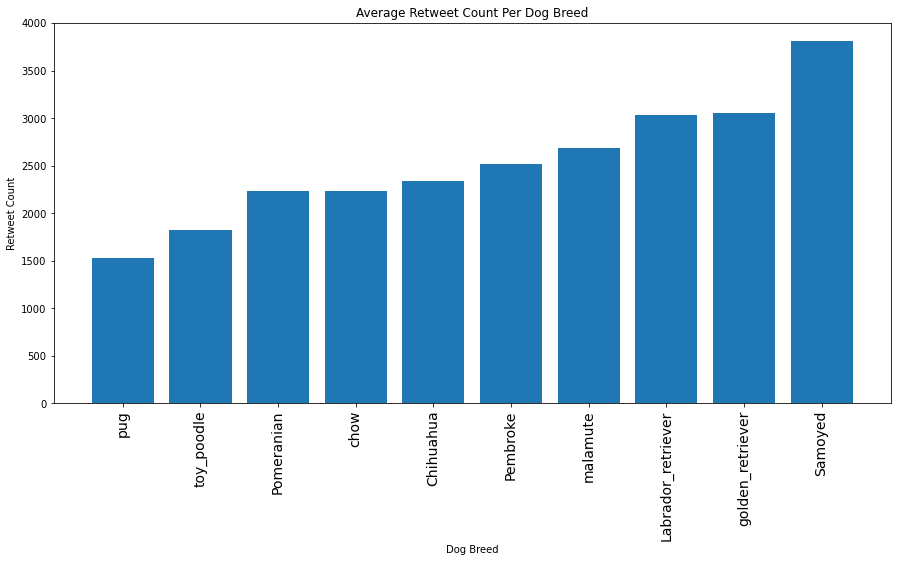

In [68]:
# Plot a bar chart to show the average retweet count of the 10 dog_breeds most posted on the WeRateDogs Twitter account
locations_breed = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
my_labels_breed = df_breed_grouped.index
plt.figure(figsize=(15, 7))
plt.bar(locations_breed, df_breed_grouped, tick_label=my_labels_breed)
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Dog Breed')
plt.ylabel('Retweet Count')
plt.title('Average Retweet Count Per Dog Breed')

### Average Favorite Count Per Dog Stage
The next analysis will involve evaluating the distribution of average favorite count per dog stage.

In [13]:
# Most favorited dog_stage
df_dog_stage = df.groupby('dog_stage')[['rating_numerator', 'retweet_count', 'favorite_count']].mean().sort_values(by='favorite_count', ascending=False)
df_dog_stage

,rating_numerator,retweet_count,favorite_count
dog_stage,,,
puppo,12.043478,5803.304348,20560.739130
doggo,11.870968,5981.354839,17618.951613
doggo and pupper,11.000000,3730.250000,12727.000000
floofer,11.875000,3843.125000,11688.625000
None,12.435280,2098.881999,7358.918122
pupper,10.716418,1927.567164,6256.995025


Text(0.5, 1.0, 'Distribution of Average Favorite Count Per Dog Stage')

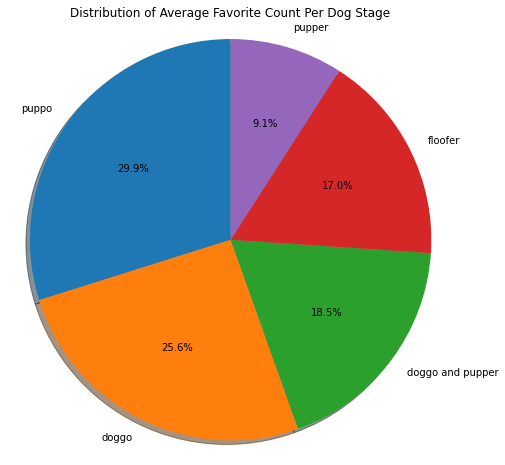

In [77]:
# Plot pie chart of most favorited dog stage
labels_dog_stage = ['puppo', 'doggo', 'doggo and pupper', 'floofer', 'pupper']
sizes_dog_stage = [20560, 17618, 12727, 11688,  6256]
plt.figure(figsize=(8,8))
plt.pie(sizes_dog_stage, labels=labels_dog_stage, startangle=90, shadow=True, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Average Favorite Count Per Dog Stage')

### Analysis of Monthly Tweet Data
This analysis will involve determining the distribution of tweet count on a monthly basis, as well as how the retweet and favorite count varied on a monthly basis, from  November 2015 - August 2017.

In [15]:
# Convert the timestamp column to a datetime data type.
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963 entries, 0 to 1962
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1963 non-null   int64              
 1   timestamp           1963 non-null   datetime64[ns, UTC]
 2   source              1963 non-null   object             
 3   text                1963 non-null   object             
 4   expanded_urls       1963 non-null   object             
 5   rating_numerator    1963 non-null   int64              
 6   rating_denominator  1963 non-null   int64              
 7   name                1963 non-null   object             
 8   dog_stage           1963 non-null   object             
 9   dog_breed           1963 non-null   object             
 10  retweet_count       1963 non-null   int64              
 11  favorite_count      1963 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5

In [17]:
# Make a copy of the master DataFrame and add a month column
df_1 = df.copy()
df_1['month'] = df_1['timestamp'].dt.month_name()

In [18]:
# Add a year column
df_1['year'] = df_1['timestamp'].dt.year

In [19]:
df_1.sample(4)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_breed,retweet_count,favorite_count,month,year
1345,680889648562991104,2015-12-26 23:15:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cheesy. It's her birthday. She's patie...,https://twitter.com/dog_rates/status/680889648...,9,10,Cheesy,None,Shetland_sheepdog,327,1616,December,2015
245,832397543355072512,2017-02-17 01:13:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Eevee. She wants to see how you're doi...,https://twitter.com/dog_rates/status/832397543...,12,10,Eevee,None,Pekinese,2041,11263,February,2017
1694,670823764196741120,2015-11-29 04:37:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Remington. He's a man dime. 12/10 http...,https://twitter.com/dog_rates/status/670823764...,12,10,Remington,None,Labrador_retriever,162,677,November,2015
717,749417653287129088,2016-07-03 01:41:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He's the most unphotogenic puppe...,https://twitter.com/dog_rates/status/749417653...,11,10,Finn,pupper,papillon,1518,5703,July,2016


In [20]:
# Average rating_numerator,retweet_count and favorite_count per month
df_1.query('year == 2016').groupby('month')[['rating_numerator', 'retweet_count', 'favorite_count']].mean().sort_values(by='favorite_count', ascending=False)

,rating_numerator,retweet_count,favorite_count
month,,,
December,12.166667,4498.111111,14337.074074
November,12.038462,3962.384615,12659.269231
October,12.676923,3436.507692,11300.184615
September,11.435484,2943.806452,9667.403226
June,10.215190,3608.379747,9229.911392
August,10.948276,2912.051724,8771.637931
July,32.862069,2034.045977,6088.390805
May,14.303571,1800.339286,5425.267857
April,11.148148,1303.962963,4078.907407


In [81]:
print("Number of tweets per month in 2015")
print(df_1.query('year == 2015')['month'].value_counts())
print()
print("Number of tweets per month in 2016")
print(df_1.query('year == 2016')['month'].value_counts())
print()
print("Number of tweets per month in 2017")
print(df_1.query('year == 2017')['month'].value_counts())

Number of tweets per month in 2015
December    359
November    295
Name: month, dtype: int64

Number of tweets per month in 2016
January      166
March        118
February     108
July          87
June          79
October       65
September     62
August        58
May           56
December      54
April         54
November      52
Name: month, dtype: int64

Number of tweets per month in 2017
January     66
February    63
July        49
March       45
June        43
May         42
April       40
August       2
Name: month, dtype: int64


#### Analysis of average retweet and favorite count in 2016

In [22]:
# DataFrame of the average rating_numerator, retweet_count and favorite_count in the fukk year 2016
df_1_2016 = df_1.query('year == 2016').groupby('month')[['rating_numerator','retweet_count', 'favorite_count']].mean().sort_values(by='retweet_count')
df_1_2016

,rating_numerator,retweet_count,favorite_count
month,,,
January,10.734940,1232.265060,3439.608434
April,11.148148,1303.962963,4078.907407
February,10.870370,1315.222222,3749.907407
March,12.025424,1328.305085,3928.296610
May,14.303571,1800.339286,5425.267857
July,32.862069,2034.045977,6088.390805
August,10.948276,2912.051724,8771.637931
September,11.435484,2943.806452,9667.403226
October,12.676923,3436.507692,11300.184615


In [23]:
# Add a new column 'count'
df_1_2016['count'] = [232, 94, 171, 163, 98, 136, 60, 62, 65, 122, 347, 413]

In [24]:
# Sort Values by retweet_count
df_1_2016.sort_values(by='retweet_count')

,rating_numerator,retweet_count,favorite_count,count
month,,,,
January,10.734940,1232.265060,3439.608434,232
April,11.148148,1303.962963,4078.907407,94
February,10.870370,1315.222222,3749.907407,171
March,12.025424,1328.305085,3928.296610,163
May,14.303571,1800.339286,5425.267857,98
July,32.862069,2034.045977,6088.390805,136
August,10.948276,2912.051724,8771.637931,60
September,11.435484,2943.806452,9667.403226,62
October,12.676923,3436.507692,11300.184615,65


In [25]:
# Sort Values by favorite count
df_1_2016.sort_values(by='favorite_count')

,rating_numerator,retweet_count,favorite_count,count
month,,,,
January,10.734940,1232.265060,3439.608434,232
February,10.870370,1315.222222,3749.907407,171
March,12.025424,1328.305085,3928.296610,163
April,11.148148,1303.962963,4078.907407,94
May,14.303571,1800.339286,5425.267857,98
July,32.862069,2034.045977,6088.390805,136
August,10.948276,2912.051724,8771.637931,60
June,10.215190,3608.379747,9229.911392,122
September,11.435484,2943.806452,9667.403226,62


In [26]:
# DataFrame with average retweet count sorted in ascending order
df_1_2016_ret = df_1_2016.retweet_count
df_1_2016_ret

month
January      1232.265060
April        1303.962963
February     1315.222222
March        1328.305085
May          1800.339286
July         2034.045977
August       2912.051724
September    2943.806452
October      3436.507692
June         3608.379747
November     3962.384615
December     4498.111111
Name: retweet_count, dtype: float64

In [27]:
# DataFrame with average favorite count sorted in ascending order
df_1_2016_fav = df_1_2016.favorite_count
df_1_2016_fav

month
January       3439.608434
April         4078.907407
February      3749.907407
March         3928.296610
May           5425.267857
July          6088.390805
August        8771.637931
September     9667.403226
October      11300.184615
June          9229.911392
November     12659.269231
December     14337.074074
Name: favorite_count, dtype: float64

Text(0.5, 1.0, 'Average Retweet Count per Month in 2016')

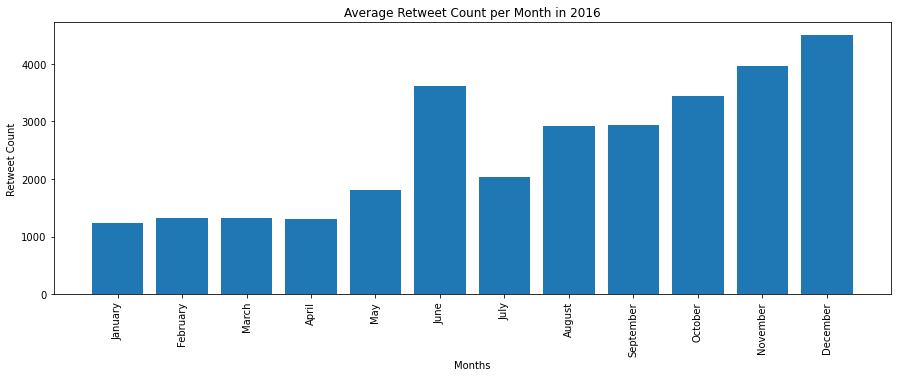

In [44]:
# Plot of average retweet count per month in 2016
locations_ret = [1, 4, 2, 3, 5, 7, 8, 9, 10, 6, 11, 12]
my_labels_ret = df_1_2016_ret.index
plt.figure(figsize=(15, 5))
plt.bar(locations_ret, df_1_2016_ret, tick_label=my_labels_ret)
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.ylabel('Retweet Count')
plt.title('Average Retweet Count per Month in 2016')

Text(0.5, 1.0, 'Average Favorite Count per Month in 2016')

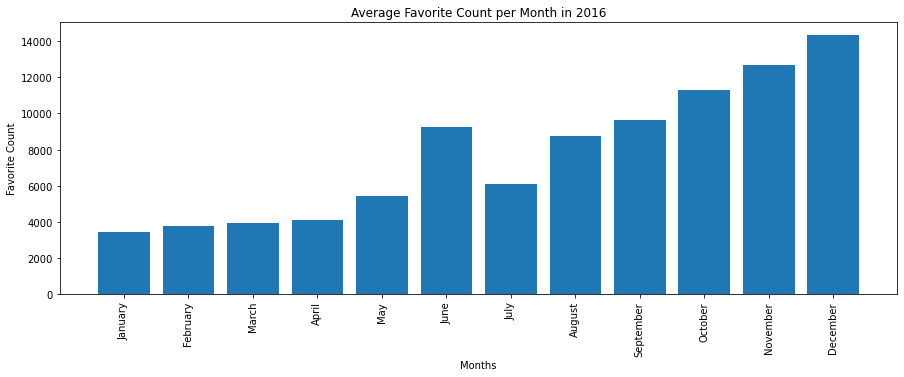

In [45]:
# Plot of average favorite count per month in 2016
locations_fav = [1, 4, 2, 3, 5, 7, 8, 9, 10, 6, 11, 12]
my_labels_fav = df_1_2016_fav.index
plt.figure(figsize=(15, 5))
plt.bar(locations_ret, df_1_2016_fav, tick_label=my_labels_fav)
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.ylabel('Favorite Count')
plt.title('Average Favorite Count per Month in 2016')

In [30]:
df_1['month'].value_counts()

December     413
November     347
January      232
February     171
March        163
July         136
June         122
May           98
April         94
October       65
September     62
August        60
Name: month, dtype: int64

#### Analysis of variation of Tweet count per month from November 2015 - August 2017

In [34]:
# Create a column containing the month and year
df_2 = df_1.copy()
df_2['month_year'] = df_1['timestamp'].dt.to_period('M')
df_2

D:\WASHINGTON\Washington\Software\Anaconda\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_breed,retweet_count,favorite_count,month,year,month_year
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,7019,33843,August,2017,2017-08
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,Chihuahua,5303,29360,August,2017,2017-08
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,Chihuahua,3486,22077,July,2017,2017-07
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,Labrador_retriever,7232,36974,July,2017,2017-07
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,basset,7772,35344,July,2017,2017-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,miniature_pinscher,37,89,November,2015,2015-11
1959,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,Rhodesian_ridgeback,115,246,November,2015,2015-11
1960,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,German_shepherd,36,99,November,2015,2015-11
1961,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,redbone,39,112,November,2015,2015-11


In [35]:
df_2['month_year'].value_counts()

2015-12    359
2015-11    295
2016-01    166
2016-03    118
2016-02    108
2016-07     87
2016-06     79
2017-01     66
2016-10     65
2017-02     63
2016-09     62
2016-08     58
2016-05     56
2016-12     54
2016-04     54
2016-11     52
2017-07     49
2017-03     45
2017-06     43
2017-05     42
2017-04     40
2017-08      2
Freq: M, Name: month_year, dtype: int64

Text(0.5, 1.0, 'Tweet Count per Month')

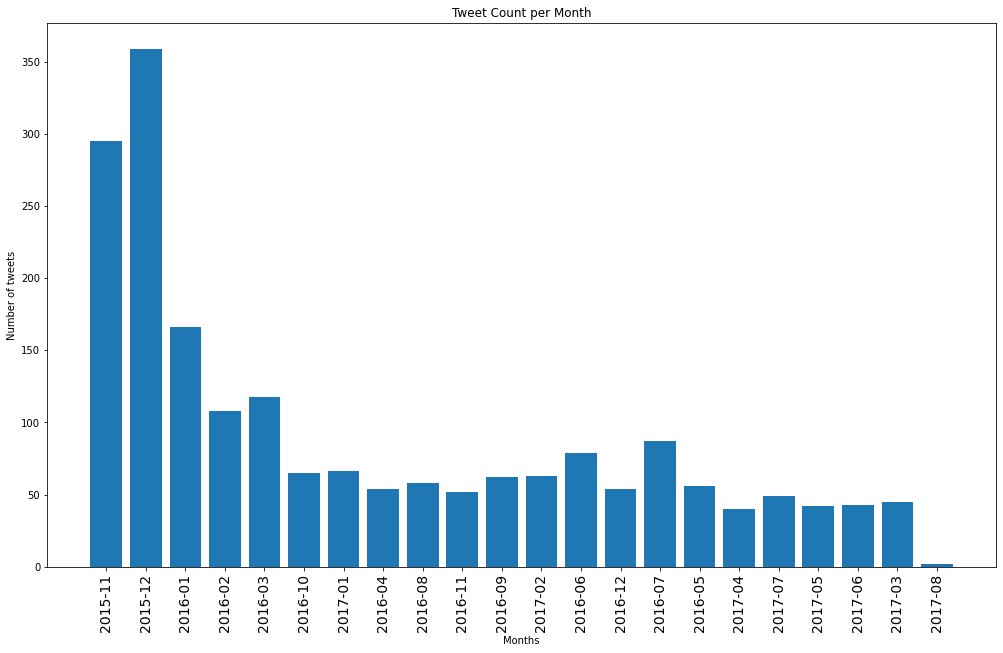

In [69]:
# Plot of number of tweets per month
df_2_month_count = df_2['month_year'].value_counts()
locations_month_year = [2, 1, 3, 5, 4, 15, 13, 7, 6, 12, 11, 9, 16, 14, 8, 10, 18, 21, 20, 19, 17, 22]
labels_month_year = df_2_month_count.index
plt.figure(figsize=(17, 10))
plt.bar(locations_month_year, df_2_month_count, tick_label=labels_month_year)
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Months')
plt.ylabel('Number of tweets')
plt.title('Tweet Count per Month')

A comparison of the change of favorite count during all months will then be made

In [65]:
# Obtain a DataFrame of average retweet and favorite count during all months within the dataset
df_2_month_fav = df_2.groupby('month_year')[['favorite_count']].mean()
df_2_month_fav.favorite_count

month_year
2015-11     1090.759322
2015-12     3012.930362
2016-01     3439.608434
2016-02     3749.907407
2016-03     3928.296610
2016-04     4078.907407
2016-05     5425.267857
2016-06     9229.911392
2016-07     6088.390805
2016-08     8771.637931
2016-09     9667.403226
2016-10    11300.184615
2016-11    12659.269231
2016-12    14337.074074
2017-01    17132.136364
2017-02    15948.984127
2017-03    17200.755556
2017-04    20295.500000
2017-05    26221.714286
2017-06    25230.418605
2017-07    27952.102041
2017-08    31601.500000
Freq: M, Name: favorite_count, dtype: float64

Text(0.5, 1.0, 'Average Favorite Count per Month')

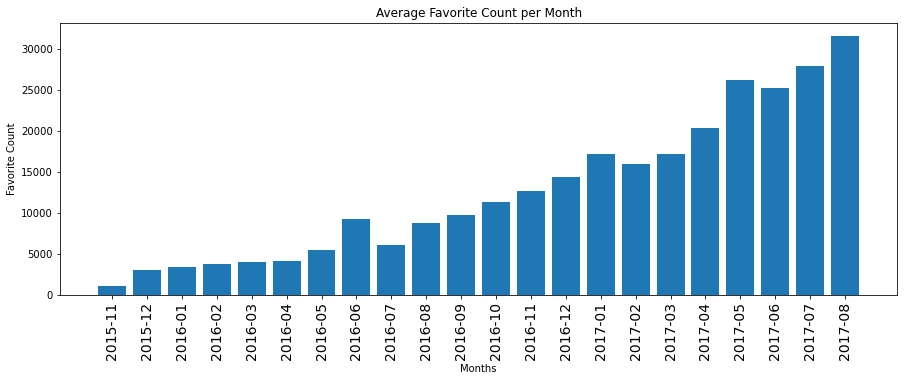

In [70]:
locations_month_fav = np.arange(1, 23)
my_labels_month_fav = df_2_month_fav.index
plt.figure(figsize=(15, 5))
plt.bar(locations_month_fav, df_2_month_fav.favorite_count, tick_label=my_labels_month_fav)
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Months')
plt.ylabel('Favorite Count')
plt.title('Average Favorite Count per Month')

In [87]:
print(df.query('dog_breed == "French_bulldog"').value_counts().sum())

30


### Insights:
1. The dog breeds that received the highest average favorite count were:
   - Bedlington Terrier (6 tweets in total) - 21570
   - Saluki (4 tweets in total) - 20822 likes per tweet
   - French Bulldog (30 tweets in total) - 17554 likes per tweet

2. The top 10 dog breeds that were tweeted the most were as documented below. Of these, the Samoyed breed received the highest average number of retweets.
  - golden_retriever (156 tweets) - 3059
  - Labrador_retriever (103 tweets) - 3031
  - Pembroke (94 tweets) - 2521
  - Chihuahua (90 tweets) - 2337
  - pug (62 tweets) - 1525
  - toy_poodle (49 tweets) - 1825
  - chow (48 tweets) - 2237
  - Pomeranian (41 tweets) - 2230
  - Samoyed (41 tweets) - 3812
  - malamute (33 tweets) - 2685

3. The dog stage that received the highest average favorite count was puppo.

4. The number of tweets from the WeRateDogs Twitter account reduced significantly since the time the account was created, from a high of 350 in December 2015 to about 45 tweets per month in 2017.

5. The average retweet and favorite counts increased each month since the account was created.

In [89]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1.963000e+03,1963.000000,1963.000000,1963.000000,1963.000000
mean,7.358032e+17,12.228732,10.479368,2261.126337,7764.348446
std,6.745690e+16,41.718453,6.867165,4044.266163,11438.032158
min,6.660209e+17,0.000000,2.000000,11.000000,66.000000
25%,6.758342e+17,10.000000,10.000000,498.000000,1654.000000
50%,7.087111e+17,11.000000,10.000000,1088.000000,3505.000000
75%,7.877641e+17,12.000000,10.000000,2586.500000,9658.000000
max,8.924206e+17,1776.000000,170.000000,70839.000000,145027.000000


### Visualization

Text(0.5, 1.0, 'Average Retweet Count Per Dog Breed')

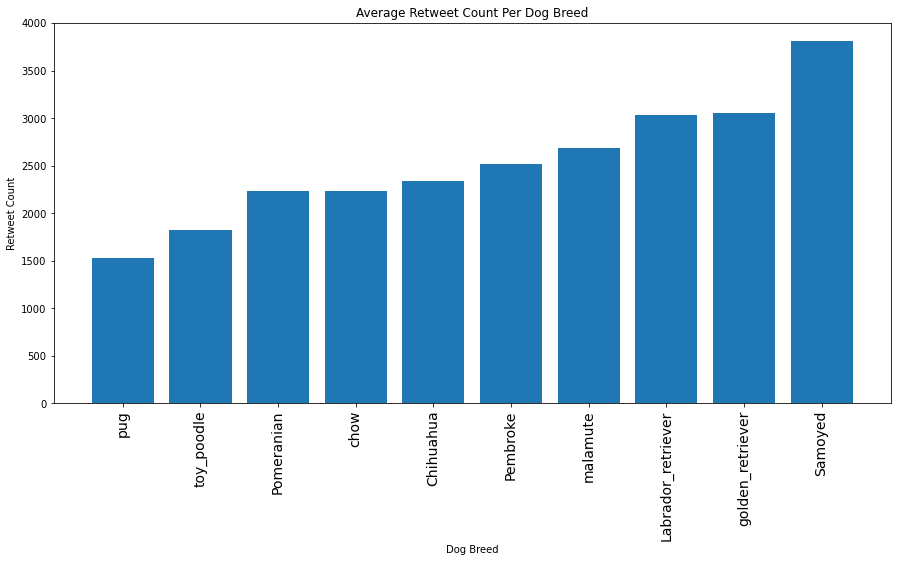

In [68]:
# Plot a bar chart to show the average retweet count of the 10 dog_breeds most posted on the WeRateDogs Twitter account
locations_breed = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
my_labels_breed = df_breed_grouped.index
plt.figure(figsize=(15, 7))
plt.bar(locations_breed, df_breed_grouped, tick_label=my_labels_breed)
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Dog Breed')
plt.ylabel('Retweet Count')
plt.title('Average Retweet Count Per Dog Breed')

Text(0.5, 1.0, 'Distribution of Average Favorite Count Per Dog Stage')

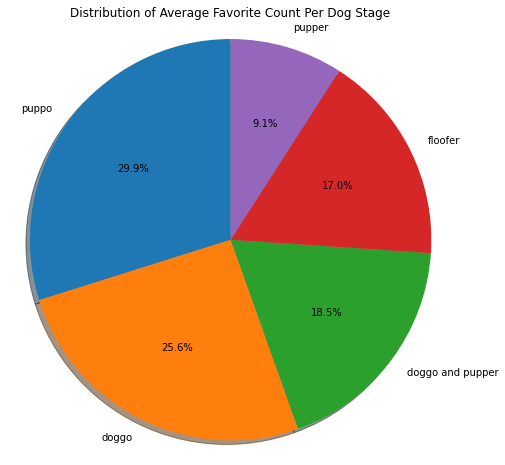

In [77]:
# Plot pie chart of most favorited dog stage
labels_dog_stage = ['puppo', 'doggo', 'doggo and pupper', 'floofer', 'pupper']
sizes_dog_stage = [20560, 17618, 12727, 11688,  6256]
plt.figure(figsize=(8,8))
plt.pie(sizes_dog_stage, labels=labels_dog_stage, startangle=90, shadow=True, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Average Favorite Count Per Dog Stage')

Text(0.5, 1.0, 'Average Retweet Count per Month in 2016')

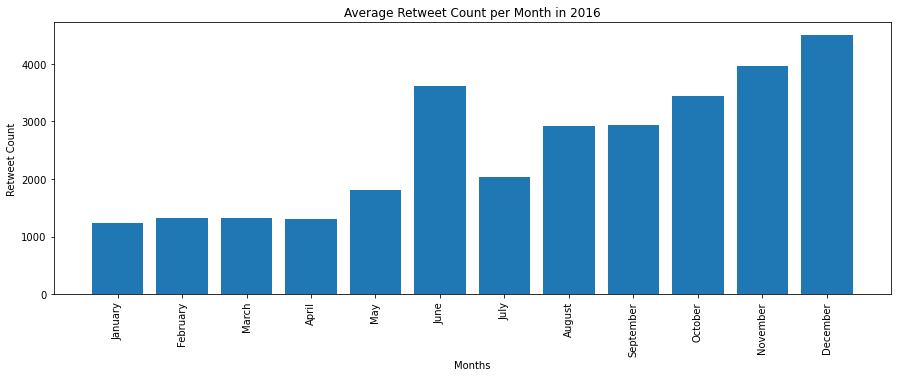

In [44]:
# Plot of average retweet count per month in 2016
locations_ret = [1, 4, 2, 3, 5, 7, 8, 9, 10, 6, 11, 12]
my_labels_ret = df_1_2016_ret.index
plt.figure(figsize=(15, 5))
plt.bar(locations_ret, df_1_2016_ret, tick_label=my_labels_ret)
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.ylabel('Retweet Count')
plt.title('Average Retweet Count per Month in 2016')

Text(0.5, 1.0, 'Average Favorite Count per Month in 2016')

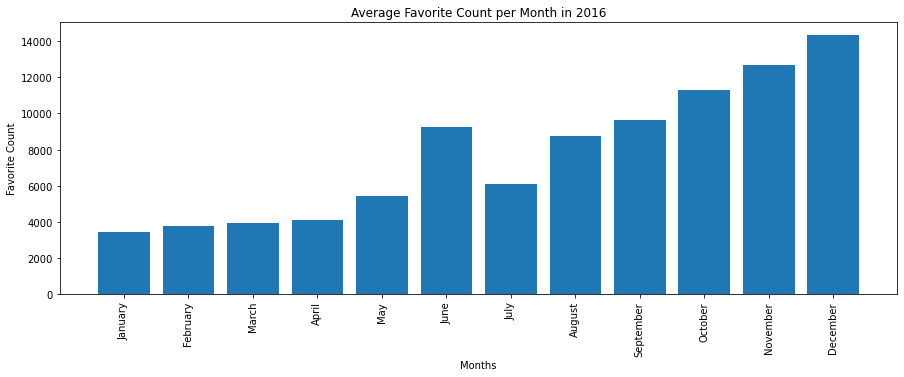

In [45]:
# Plot of average favorite count per month in 2016
locations_fav = [1, 4, 2, 3, 5, 7, 8, 9, 10, 6, 11, 12]
my_labels_fav = df_1_2016_fav.index
plt.figure(figsize=(15, 5))
plt.bar(locations_ret, df_1_2016_fav, tick_label=my_labels_fav)
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.ylabel('Favorite Count')
plt.title('Average Favorite Count per Month in 2016')

Text(0.5, 1.0, 'Tweet Count per Month')

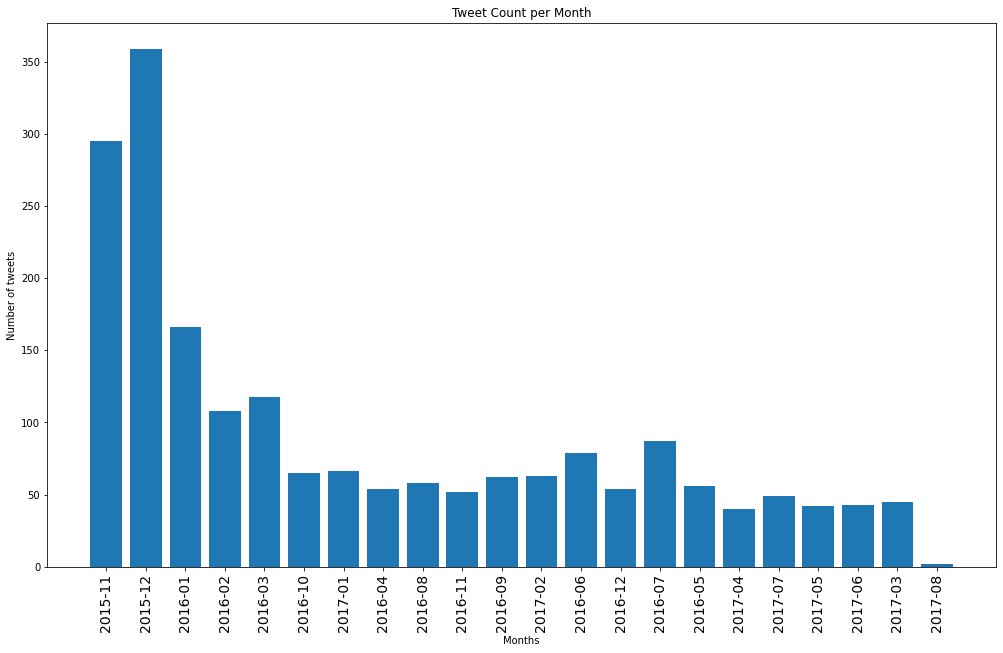

In [69]:
# Plot of number of tweets per month
df_2_month_count = df_2['month_year'].value_counts()
locations_month_year = [2, 1, 3, 5, 4, 15, 13, 7, 6, 12, 11, 9, 16, 14, 8, 10, 18, 21, 20, 19, 17, 22]
labels_month_year = df_2_month_count.index
plt.figure(figsize=(17, 10))
plt.bar(locations_month_year, df_2_month_count, tick_label=labels_month_year)
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Months')
plt.ylabel('Number of tweets')
plt.title('Tweet Count per Month')

Text(0.5, 1.0, 'Average Favorite Count per Month')

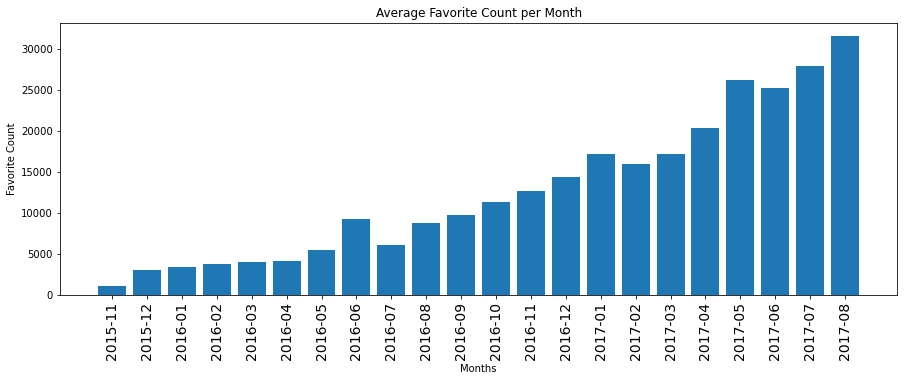

In [70]:
# Plot of average favorite count per month
locations_month_fav = np.arange(1, 23)
my_labels_month_fav = df_2_month_fav.index
plt.figure(figsize=(15, 5))
plt.bar(locations_month_fav, df_2_month_fav.favorite_count, tick_label=my_labels_month_fav)
plt.xticks(rotation=90, fontsize=14)
plt.xlabel('Months')
plt.ylabel('Favorite Count')
plt.title('Average Favorite Count per Month')